In [1]:
import numpy as np # linear algebra
import pandas as pd # 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,6]

In [4]:
df = pd.read_csv('/content/archive.zip')
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [5]:
df.shape

(814, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [7]:
df['returns_5yr'].fillna(df['returns_5yr'].median(),inplace=True)

In [8]:
# unique values

In [9]:
for i in df.columns:
    print(i,': ',df.loc[:,i].nunique())

scheme_name :  789
min_sip :  10
min_lumpsum :  11
expense_ratio :  177
fund_size_cr :  693
fund_age_yr :  14
fund_manager :  260
sortino :  385
alpha :  540
sd :  581
beta :  162
sharpe :  217
risk_level :  6
amc_name :  39
rating :  6
category :  5
sub_category :  38
returns_1yr :  210
returns_3yr :  304
returns_5yr :  147


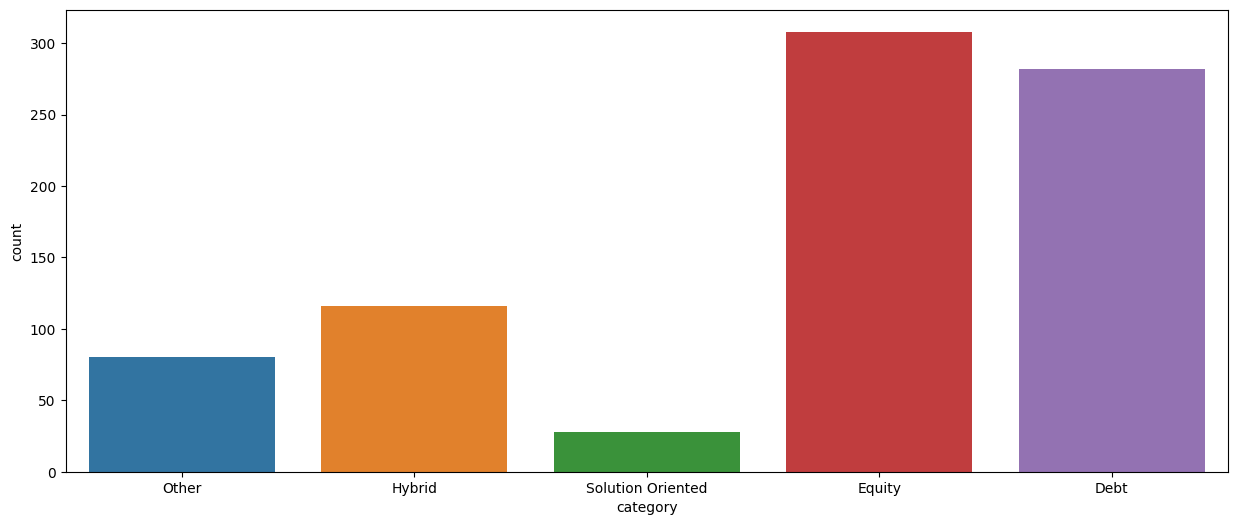

In [10]:
sns.countplot(x=df['category'])
plt.show()

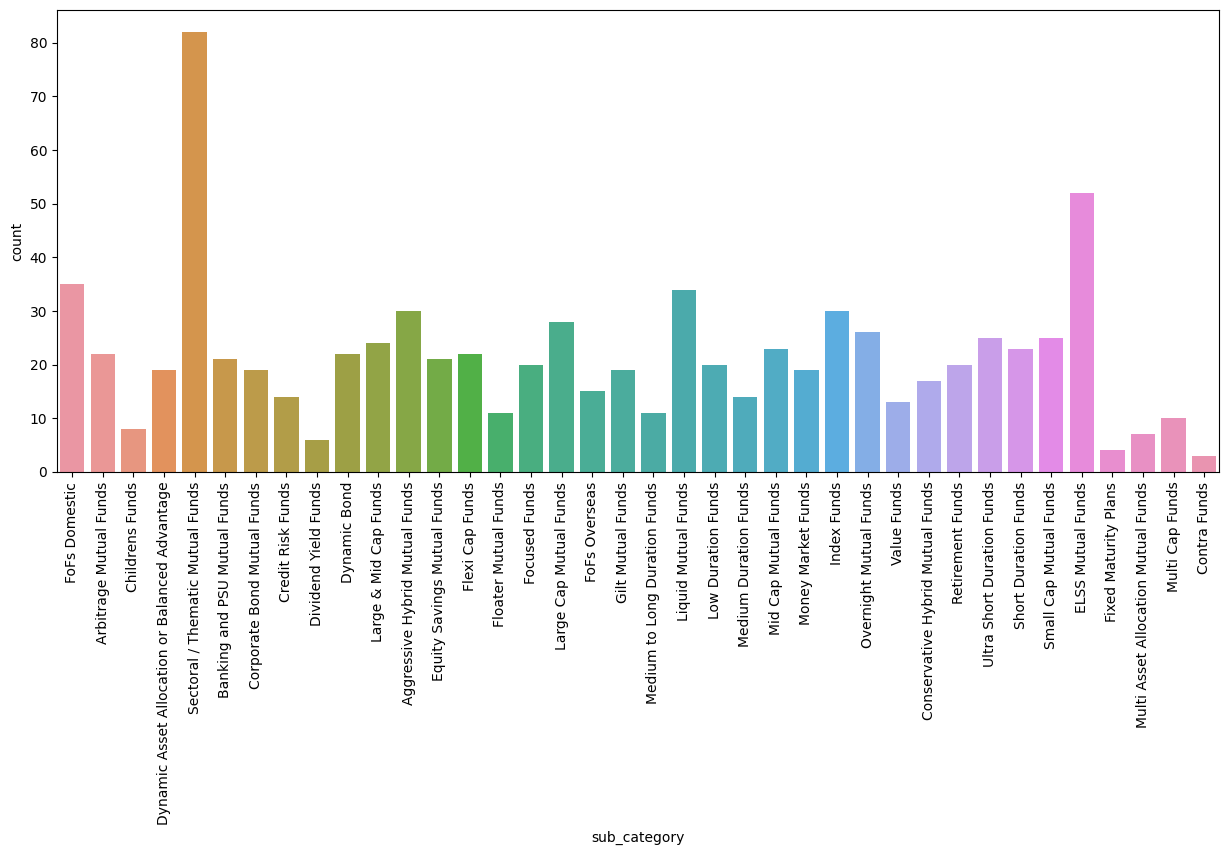

In [11]:
sns.countplot(x=df['sub_category'])
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='sub_category'>

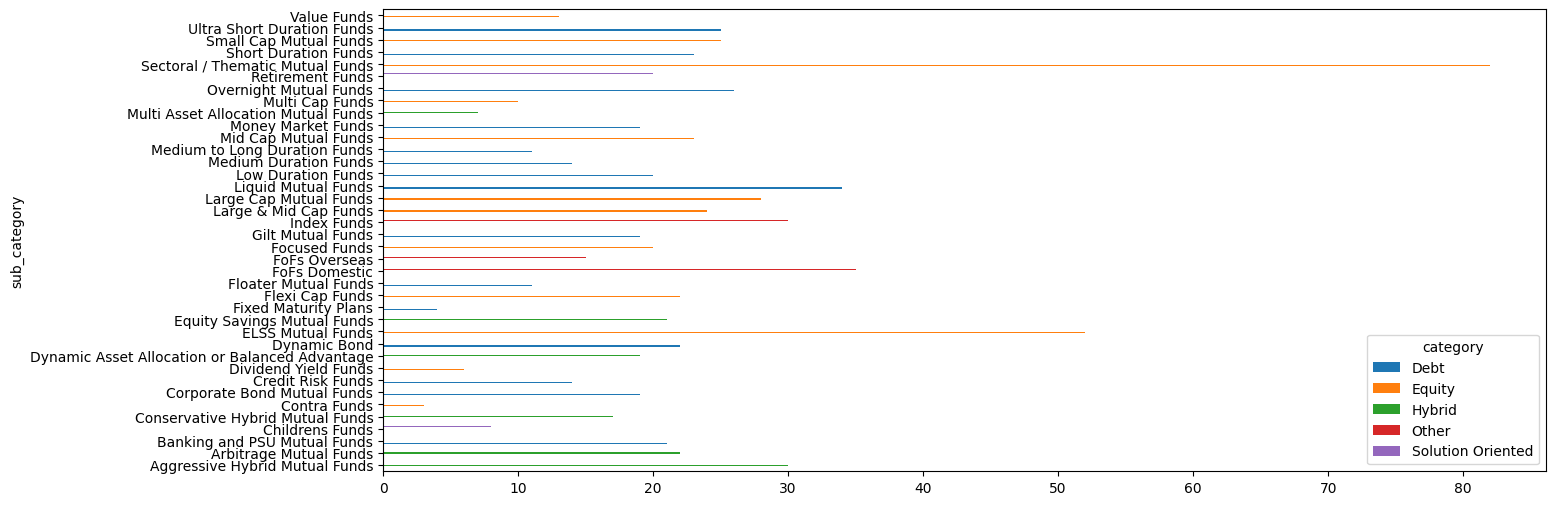

In [12]:
pd.crosstab(df['sub_category'],df['category']).plot(kind='barh')

In [13]:
num = df.select_dtypes(include=np.number).columns
len(num)

10

In [14]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,8.9
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


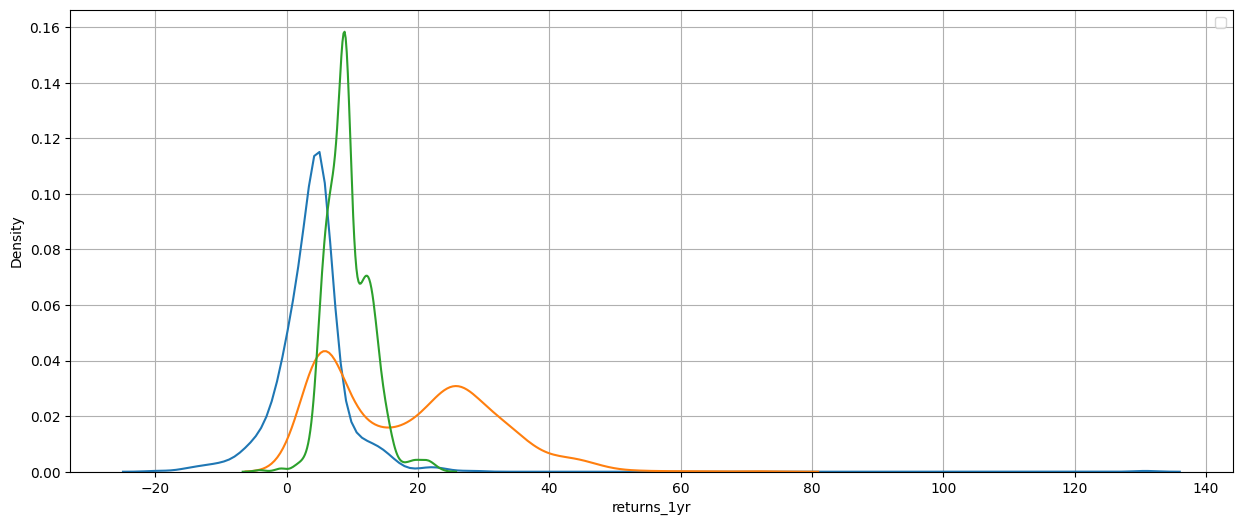

In [15]:
sns.kdeplot(data=df,x='returns_1yr')
sns.kdeplot(data=df,x='returns_3yr')
sns.kdeplot(data=df,x='returns_5yr')
plt.legend()
plt.grid()
plt.show()


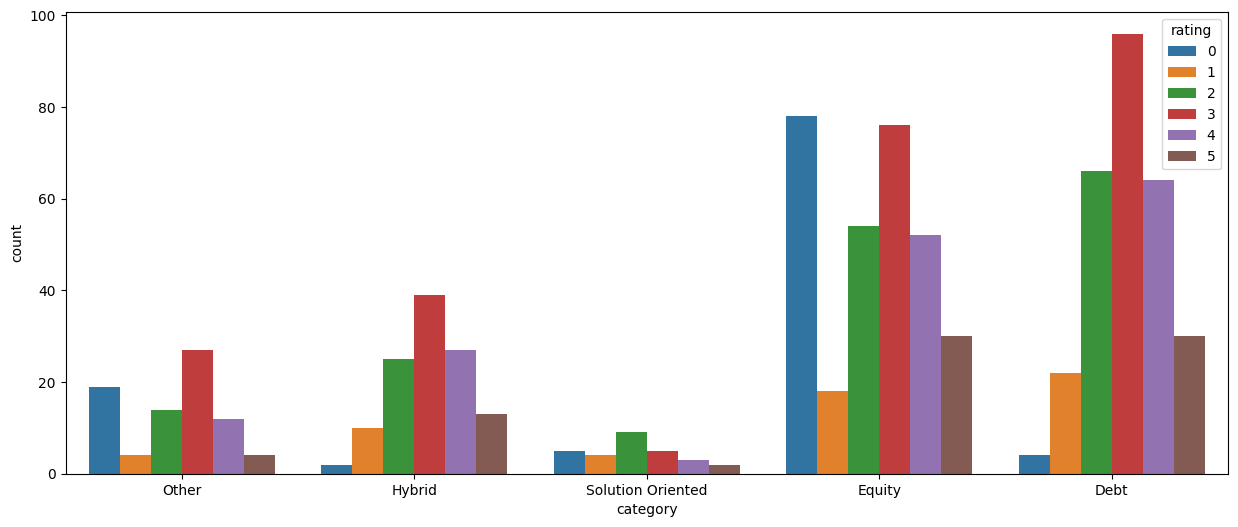

In [16]:
sns.countplot(x='category',data=df,hue='rating')
plt.show()